## Integrantes:
1. Camila Coltriani
2. Luis Dartayet
3. Irania Fuentes
4. Jonathan Fichelson
5. Ornella Cevoli
# Trabajo práctico  3: Modelos de clasificación 

## Introducción y objetivo

El objetivo de este trabajo es predecir utilizando modelos de clasificacion si un cliente se dará de baja o no de la plataforma.

In [1]:
#Las librerías utilizadas en este documento son:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import binarize

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Carga de datos

In [2]:
data  = pd.read_csv('./data/Datos ML 2021 Q2.csv', sep=';')
print("El dataset tiene {} filas y {} columnas".format(data.shape[0], data.shape[1]))
data.head()

El dataset tiene 5099 filas y 20 columnas


,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,Somewhat satified,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Tablet,1,8.0,UPI,Male,3.0,4,Mobile,Satisfied,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Tablet,1,30.0,Debit Card,Male,2.0,4,Mobile,Satisfied,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Tablet,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,Excelent service,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Tablet,1,12.0,CC,Male,NaN,3,Mobile,Excelent service,Single,3,0,11.0,1.0,1.0,3.0,130


## Descripción del dataset

#### El dataset tiene las siguientes columnas:

- CustomerID: ID del cliente
- Churn: Columna que indica si el cliente dejó de usar la plataforma o no. 1 es que se da de baja.
- CustomerTenure: Es el tiempo transcurrido desde el inicio de la relación con el cliente (en meses)
- MainDeviceLogin: Dispositivo principal que utiliza el cliente para acceder a la plataforma
- CityTier: Indicador del nivel de desarrollo de la ciudad donde vive el cliente
- WarehouseToHome: Distancia desde el centro de distribución a la vivienda del cliente (en km)
- MainPaymentMode: Método de pago más utilizado por el cliente
- Gender: Género del cliente
- HourSpendOnApp: Número de horas que el cliente ha pasado en la plataforma
- DeviceRegistered: Número de dispositivos en los que el cliente ha accedido a la plataforma
- PrefCategory: Categoría más común de las compras del cliente en el último mes
- SatisfactionScore: Nivel de satisfacción del cliente con el servicio
- MaritalStatus: Estado civil del cliente
- NumberOfAddress: Número de direcciones diferentes registradas por el cliente
- Complain: Si ha realizado reclamos
- OrderAmountHikeFromlastYear: Incremento porcentual en la cantidad de compras con respecto al año anterior
- CouponUsed: Número de cupones usados en el último mes
- OrderCount: Número de compras realizadas en el último mes
- DaySinceLastOrder: Cantidad de días desde la última compra
- CashbackAmount: Promedio de reembolsos pedidos en el último mes

Variable objetivo: Churn (termino empleado en marketing para hacer referencia a si un cliente deja de usar una aplicación y/o regresa)

## Exploración de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5099 non-null   int64  
 1   Churn                        5099 non-null   int64  
 2   CustomerTenure               4835 non-null   float64
 3   MainDeviceLogin              5099 non-null   object 
 4   CityTier                     5099 non-null   int64  
 5   WarehouseToHome              4848 non-null   float64
 6   MainPaymentMode              5099 non-null   object 
 7   Gender                       5099 non-null   object 
 8   HourSpendOnApp               4844 non-null   float64
 9   DeviceRegistered             5099 non-null   int64  
 10  PrefCategory                 5099 non-null   object 
 11  SatisfactionScore            5099 non-null   object 
 12  MaritalStatus                5099 non-null   object 
 13  NumberOfAddress   

In [4]:
data.describe()

,CustomerID,Churn,CustomerTenure,CityTier,WarehouseToHome,HourSpendOnApp,DeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5099.000000,5099.000000,4835.000000,5099.000000,4848.000000,4844.000000,5099.000000,5099.000000,5099.000000,4863.000000,4862.000000,4865.000000,4843.000000,5099.000000
mean,52550.000000,0.169837,10.159049,1.651893,15.539398,2.878406,3.639733,4.165719,0.287115,15.668312,1.701357,2.962590,4.488127,176.049421
std,1472.098842,0.375527,8.578879,0.915315,8.561799,0.721256,1.020118,2.594808,0.452460,3.680303,1.902714,2.959679,3.667401,49.532751
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51275.500000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,144.000000
50%,52550.000000,0.000000,9.000000,1.000000,13.000000,3.000000,4.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,161.000000
75%,53824.500000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55099.000000,1.000000,60.000000,3.000000,127.000000,5.000000,6.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
display(data['Churn'].value_counts())
display(data['Churn'].value_counts(normalize=True))

0    4233
1     866
Name: Churn, dtype: int64

0    0.830163
1    0.169837
Name: Churn, dtype: float64

### Detección de datos sospechosas o atípicos

In [6]:
##Se consideran columnas con valores sospechosos aquellas cuya máxima valor se encuentran por encima de 3 desviaciones estándar de la media. 
std_limit = 3
##Por la naturaleza de las variables, se considera que los valores sospechosos son aquellos que se encuentran por encima y no los inferiores.

In [7]:
# Columnas sospechosas

suspicious_columns = []

for col in data.columns:
    if(data[col].dtype == 'object'):
        continue
    mean = data[col].mean()
    std = data[col].std()
    max = data[col].max()
    if(max > mean + std_limit*std):
        suspicious_columns.append(data[col].name)
suspicious_columns


['CustomerTenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [8]:
suspicious_rows_arr = []

def investigate_suspicious_column(data, column, watch_outliers=True):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    plt.suptitle(column)
    sns.histplot(data[column], ax=ax[0])
    sns.boxplot(data=data[column], ax=ax[1], orient='h')

    plt.show()

    if(watch_outliers):
        mean = data[column].mean()
        std = data[column].std()
        max = data[column].max()

        suspicious_rows = data[data[column] > mean + std_limit*std]
        suspicious_rows_arr.append(suspicious_rows)
        display("Hay {} filas sospechosas".format(suspicious_rows.shape[0]))
        display(suspicious_rows)

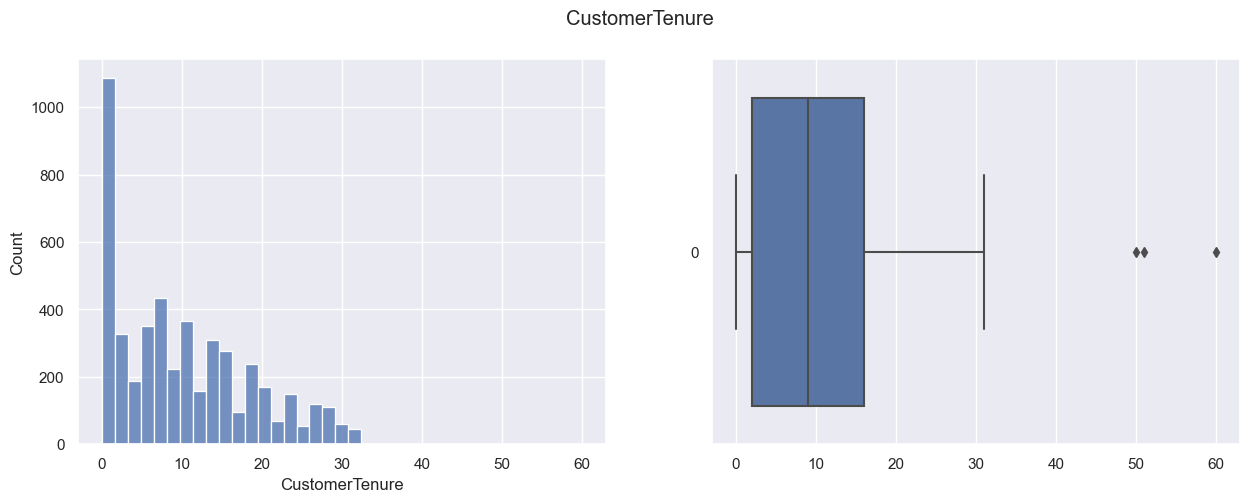

'Hay 3 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Tablet,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,Satisfied,Divorced,1,0,24.0,1.0,2.0,8.0,149
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,Not satisfied,Married,5,1,13.0,NaN,1.0,0.0,279
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,Satisfied,Divorced,2,0,25.0,2.0,3.0,9.0,174


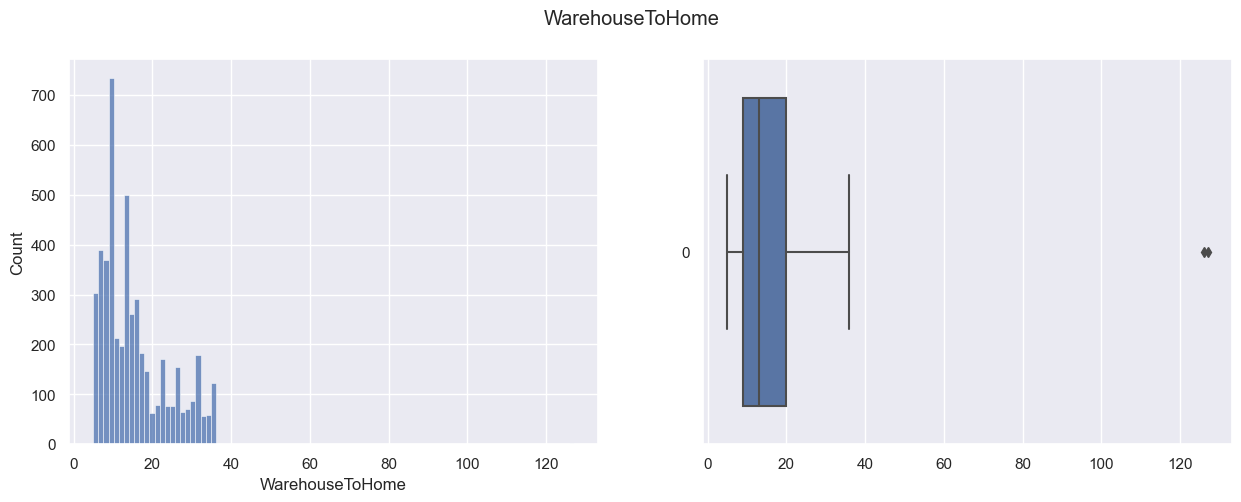

'Hay 2 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,Not satisfied,Married,3,0,15.0,1.0,1.0,0.0,135
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,Not satisfied,Married,4,0,16.0,2.0,2.0,1.0,160


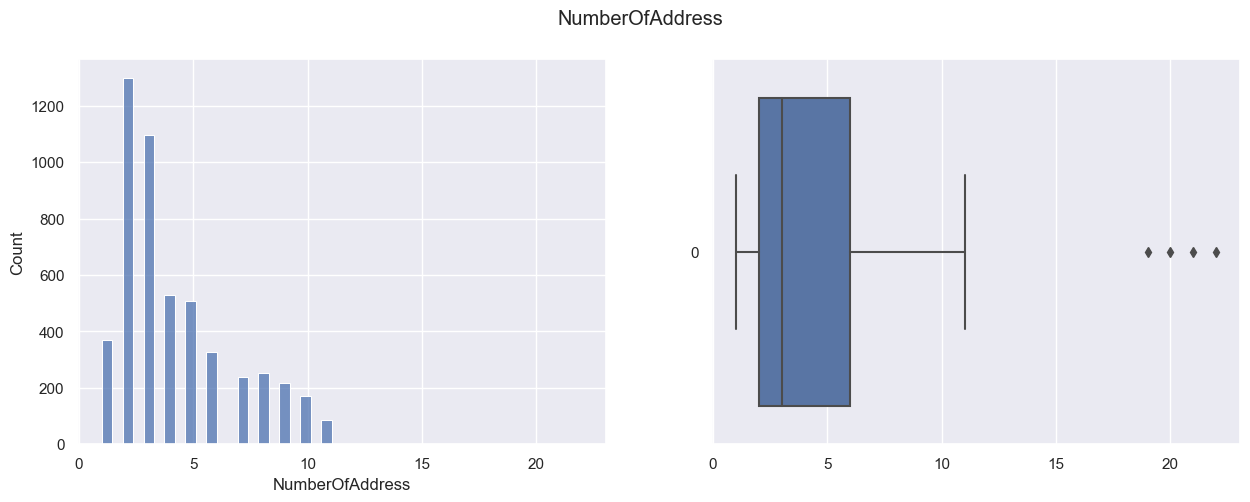

'Hay 4 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,50261,1,NaN,Computer,1,10.0,COD,Male,2.0,3,Mobile,Somewhat satified,Single,19,1,23.0,1.0,1.0,0.0,123
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,Very satisfied,Single,21,0,15.0,1.0,1.0,3.0,168
3075,53076,1,1.0,Computer,1,11.0,COD,Male,3.0,4,Mobile Phone,Somewhat satified,Single,20,1,24.0,2.0,2.0,1.0,148
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,Very satisfied,Single,22,0,16.0,2.0,2.0,4.0,193


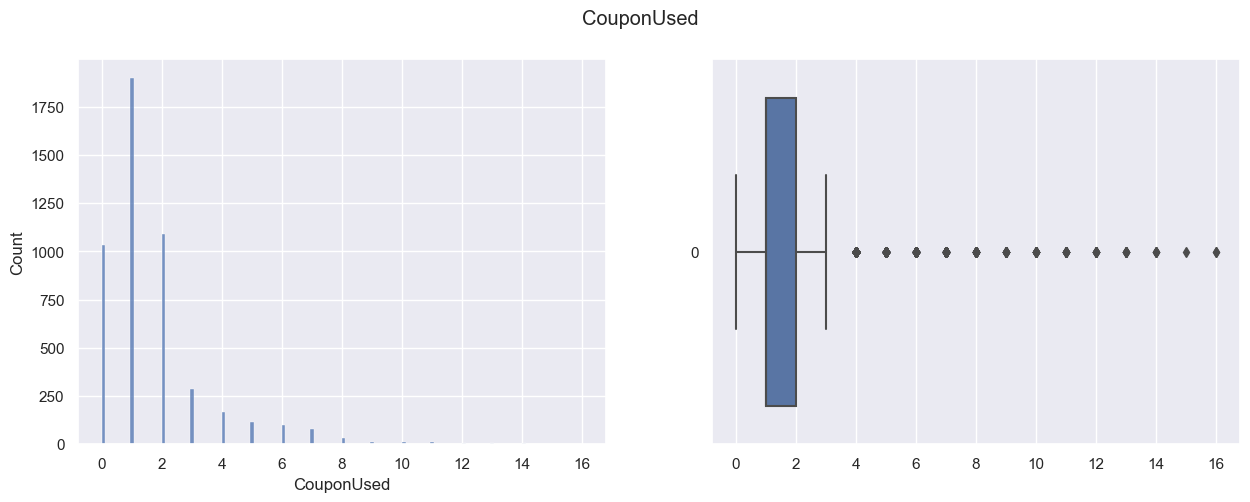

'Hay 94 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,Satisfied,Divorced,2,0,NaN,9.0,15.0,8.0,295
21,50022,1,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,Somewhat satified,Divorced,2,0,12.0,11.0,15.0,6.0,203
93,50094,0,18.0,Computer,3,12.0,Credit Card,Female,2.0,4,Fashion,Somewhat satified,Single,7,0,12.0,12.0,12.0,8.0,189
126,50127,0,12.0,Computer,1,8.0,Cash on Delivery,Female,3.0,3,Fashion,Satisfied,Single,1,0,25.0,10.0,11.0,NaN,209
201,50202,0,12.0,Computer,1,5.0,Credit Card,Male,2.0,4,Others,Somewhat satified,Divorced,2,0,NaN,9.0,13.0,3.0,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,54899,0,13.0,Mobile Phone,1,7.0,Debit Card,Female,4.0,5,Grocery,Not satisfied,Married,3,0,17.0,10.0,NaN,9.0,252
4973,54974,1,3.0,Computer,1,9.0,Debit Card,Male,3.0,4,Grocery,Not satisfied,Married,9,0,12.0,11.0,NaN,6.0,247
5042,55043,0,10.0,Mobile Phone,1,8.0,Cash on Delivery,Female,4.0,6,Fashion,Excelent service,Married,4,1,22.0,8.0,8.0,NaN,228
5086,55087,0,17.0,Mobile Phone,3,11.0,E wallet,Female,3.0,5,Fashion,Not satisfied,Single,5,0,15.0,11.0,16.0,NaN,227


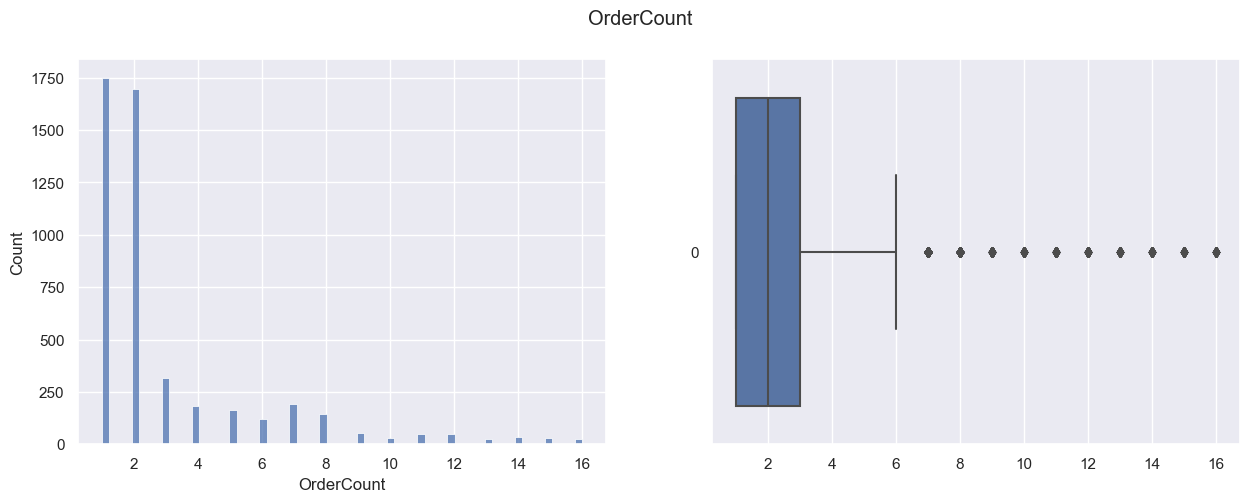

'Hay 161 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,Satisfied,Divorced,2,0,NaN,9.0,15.0,8.0,295
21,50022,1,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,Somewhat satified,Divorced,2,0,12.0,11.0,15.0,6.0,203
53,50054,0,19.0,Mobile Phone,3,6.0,E wallet,Female,3.0,3,Fashion,Excelent service,Married,2,0,25.0,4.0,15.0,7.0,205
93,50094,0,18.0,Computer,3,12.0,Credit Card,Female,2.0,4,Fashion,Somewhat satified,Single,7,0,12.0,12.0,12.0,8.0,189
112,50113,0,25.0,Computer,3,8.0,Debit Card,Male,3.0,4,Others,Satisfied,Single,2,1,18.0,NaN,15.0,12.0,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,55075,0,29.0,Computer,1,15.0,Credit Card,Male,3.0,5,Grocery,Very satisfied,Married,3,1,16.0,3.0,16.0,1.0,261
5078,55079,0,25.0,Computer,3,16.0,Debit Card,Male,3.0,4,Others,Very satisfied,Married,6,1,25.0,7.0,12.0,11.0,323
5082,55083,0,18.0,Mobile Phone,1,11.0,Debit Card,Male,4.0,2,Others,Excelent service,Married,3,0,NaN,3.0,15.0,14.0,317
5086,55087,0,17.0,Mobile Phone,3,11.0,E wallet,Female,3.0,5,Fashion,Not satisfied,Single,5,0,15.0,11.0,16.0,NaN,227


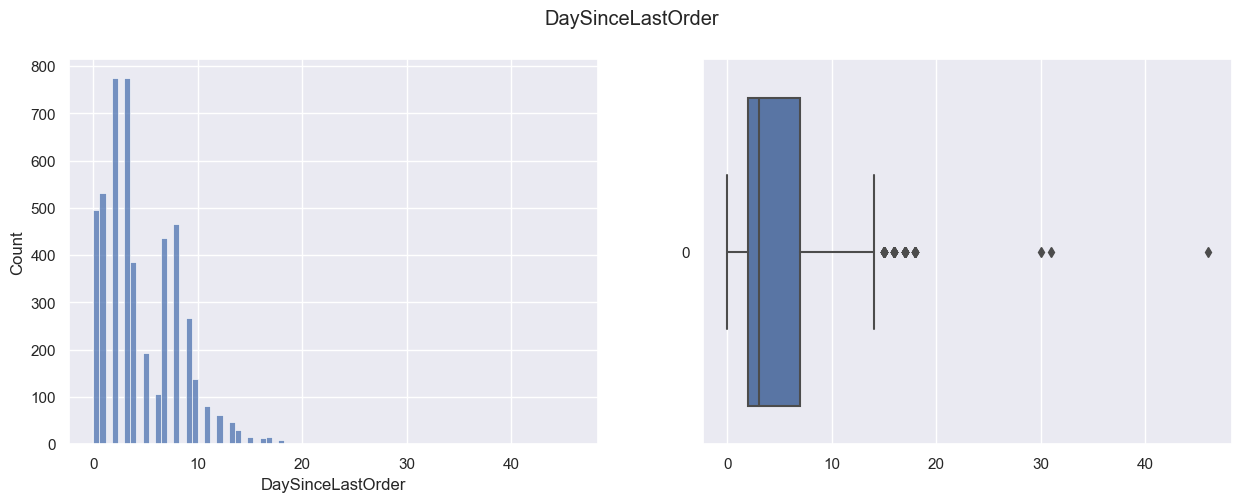

'Hay 41 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
261,50262,0,10.0,Tablet,1,20.0,Debit Card,Female,NaN,3,Mobile,Excelent service,Married,2,0,12.0,3.0,12.0,17.0,130
436,50437,0,25.0,Mobile Phone,3,9.0,E wallet,Male,2.0,4,Grocery,Excelent service,Divorced,2,0,11.0,NaN,1.0,16.0,269
491,50492,0,24.0,Mobile Phone,3,32.0,E wallet,Female,3.0,3,Grocery,Satisfied,Divorced,3,0,14.0,NaN,4.0,17.0,263
561,50562,0,14.0,Tablet,1,12.0,Credit Card,Male,2.0,3,Mobile Phone,Excelent service,Single,3,1,13.0,1.0,2.0,17.0,147
750,50751,0,17.0,Tablet,1,35.0,UPI,Male,2.0,3,Laptop & Accessory,Somewhat satified,Single,2,0,25.0,1.0,1.0,17.0,145
801,50802,0,16.0,Mobile Phone,3,10.0,E wallet,Female,2.0,4,Fashion,Somewhat satified,Single,4,0,14.0,10.0,15.0,17.0,202
953,50954,0,17.0,Mobile Phone,1,34.0,Debit Card,Male,2.0,3,Grocery,Excelent service,Divorced,4,0,13.0,NaN,14.0,17.0,263
1223,51224,0,13.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,3,Grocery,Excelent service,Married,3,0,11.0,NaN,11.0,16.0,268
1373,51374,0,17.0,Mobile Phone,1,13.0,Credit Card,Female,2.0,4,Fashion,Not satisfied,Married,4,0,14.0,0.0,5.0,17.0,202
1490,51491,0,3.0,Tablet,1,11.0,COD,Female,2.0,3,Mobile,Excelent service,Married,6,0,14.0,0.0,2.0,30.0,132


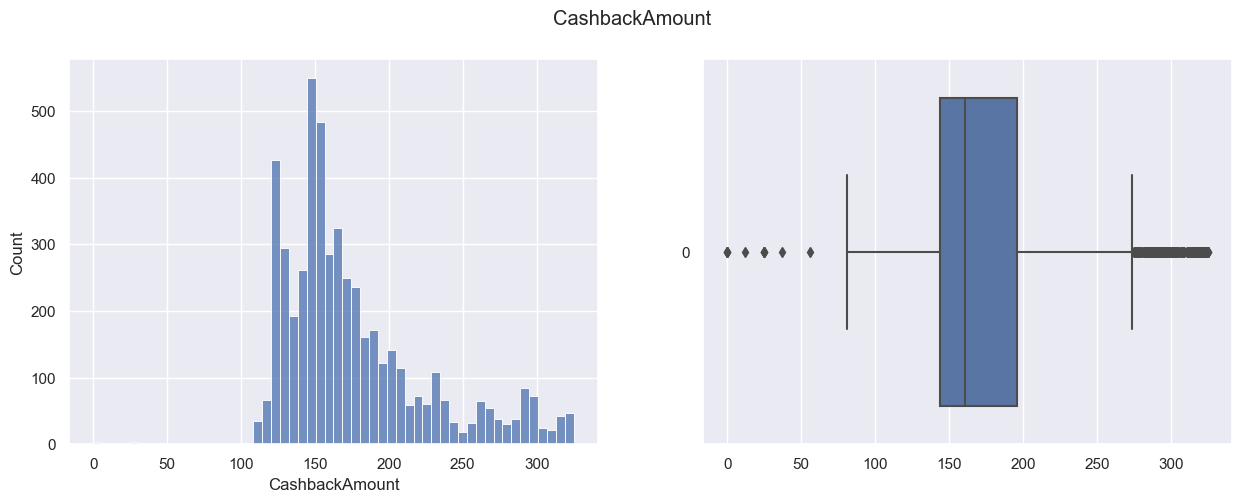

'Hay 4 filas sospechosas'

,CustomerID,Churn,CustomerTenure,MainDeviceLogin,CityTier,WarehouseToHome,MainPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PrefCategory,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2880,52881,0,26.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,5,Others,Satisfied,Divorced,2,0,15.0,2.0,12.0,10.0,325
3436,53437,0,15.0,Computer,1,14.0,Debit Card,Female,3.0,6,Others,Satisfied,Married,3,0,23.0,2.0,6.0,11.0,325
4350,54351,0,26.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,5,Others,Satisfied,Married,2,0,15.0,8.0,12.0,10.0,325
4906,54907,0,15.0,Computer,1,14.0,Debit Card,Female,3.0,6,Others,Satisfied,Married,3,0,23.0,6.0,6.0,11.0,325


In [9]:
for col in suspicious_columns:
    investigate_suspicious_column(data, col)

In [10]:
## Total de filas sospechosas
print("Hay {} filas sospechosas".format(sum([suspicious_rows.shape[0] for suspicious_rows in suspicious_rows_arr])))

Hay 309 filas sospechosas


In [11]:
## Filas sospechosas agrupadas por columna churn

suspicious_rows = pd.concat(suspicious_rows_arr)
display(suspicious_rows['Churn'].value_counts())
display(suspicious_rows['Churn'].value_counts(normalize=True))


0    266
1     43
Name: Churn, dtype: int64

0    0.860841
1    0.139159
Name: Churn, dtype: float64

Observamos que la distribución de la variable Churn entre los valores extremos es similar, por lo que no parece haber una relación entre las filas con estos datos y la variable objetivo.

Por otro lado, haciendo una observación pormenorizada, creemos que en los casos de las columnas `CouponUsed`, `OrderCount` y `DaySinceLastOrder`  y `CashbackAmount` parecen ser valores lógicos, aún tratándose de valores extremos por lo que no las eliminaremos del dataset original.

In [12]:
suspicious_columns

['CustomerTenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

Removemos las columnas mencionadas de la lista de columnas sospechosas

In [13]:
suspicious_columns.remove('CouponUsed')
suspicious_columns.remove('OrderCount')
suspicious_columns.remove('DaySinceLastOrder')
suspicious_columns.remove('CashbackAmount')

suspicious_columns

['CustomerTenure', 'WarehouseToHome', 'NumberOfAddress']

Limpiemos las filas sospechosas de las columnas que quedaron como sospechosas:

CustomerTenure, WarehouseToHome, NumberOfAddress

In [14]:
def remove_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    max = data[column].max()
    return data[data[column] <= mean + std_limit*std]

In [15]:
for col in suspicious_columns:
    data = remove_outliers(data, col)

Veamos el resultado

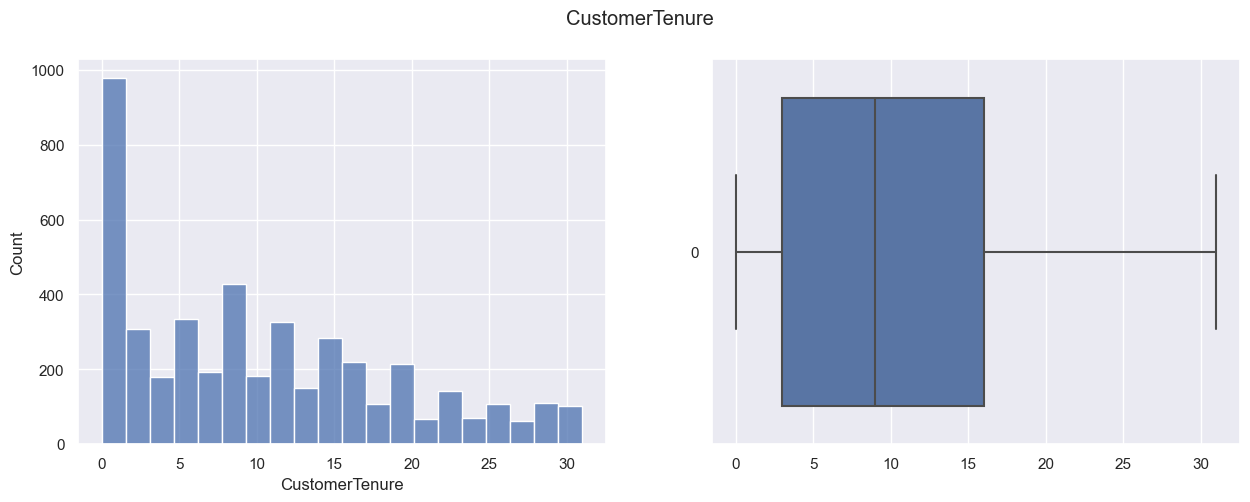

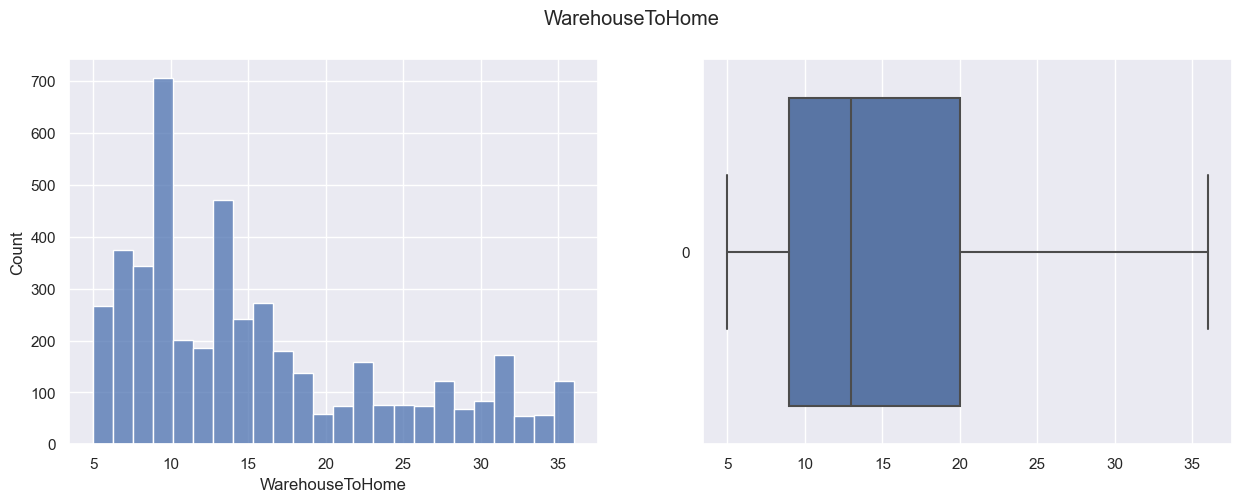

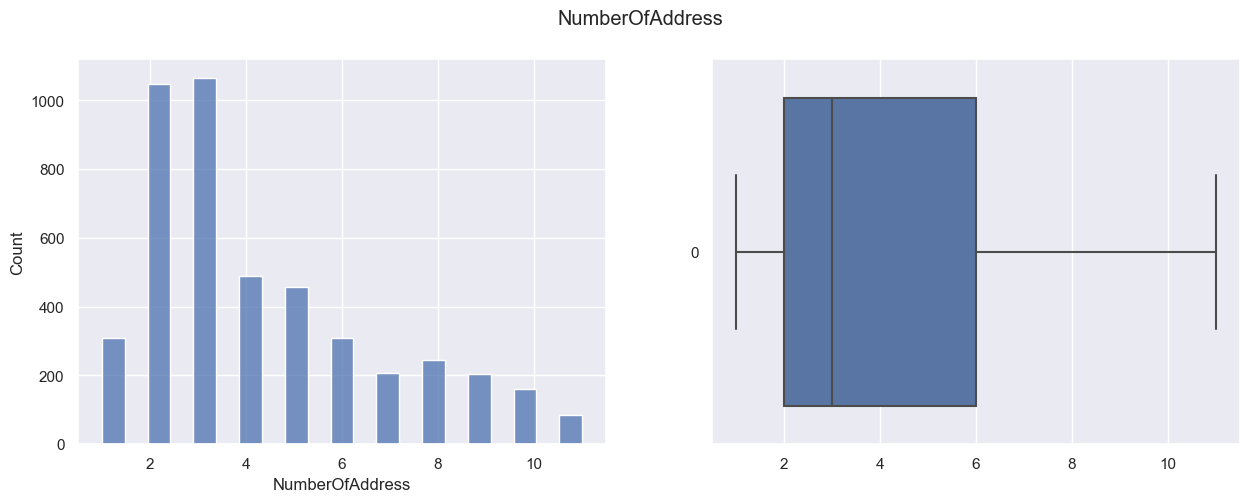

In [16]:
for col in suspicious_columns:
    investigate_suspicious_column(data, col, False)

### Correlación de las variables

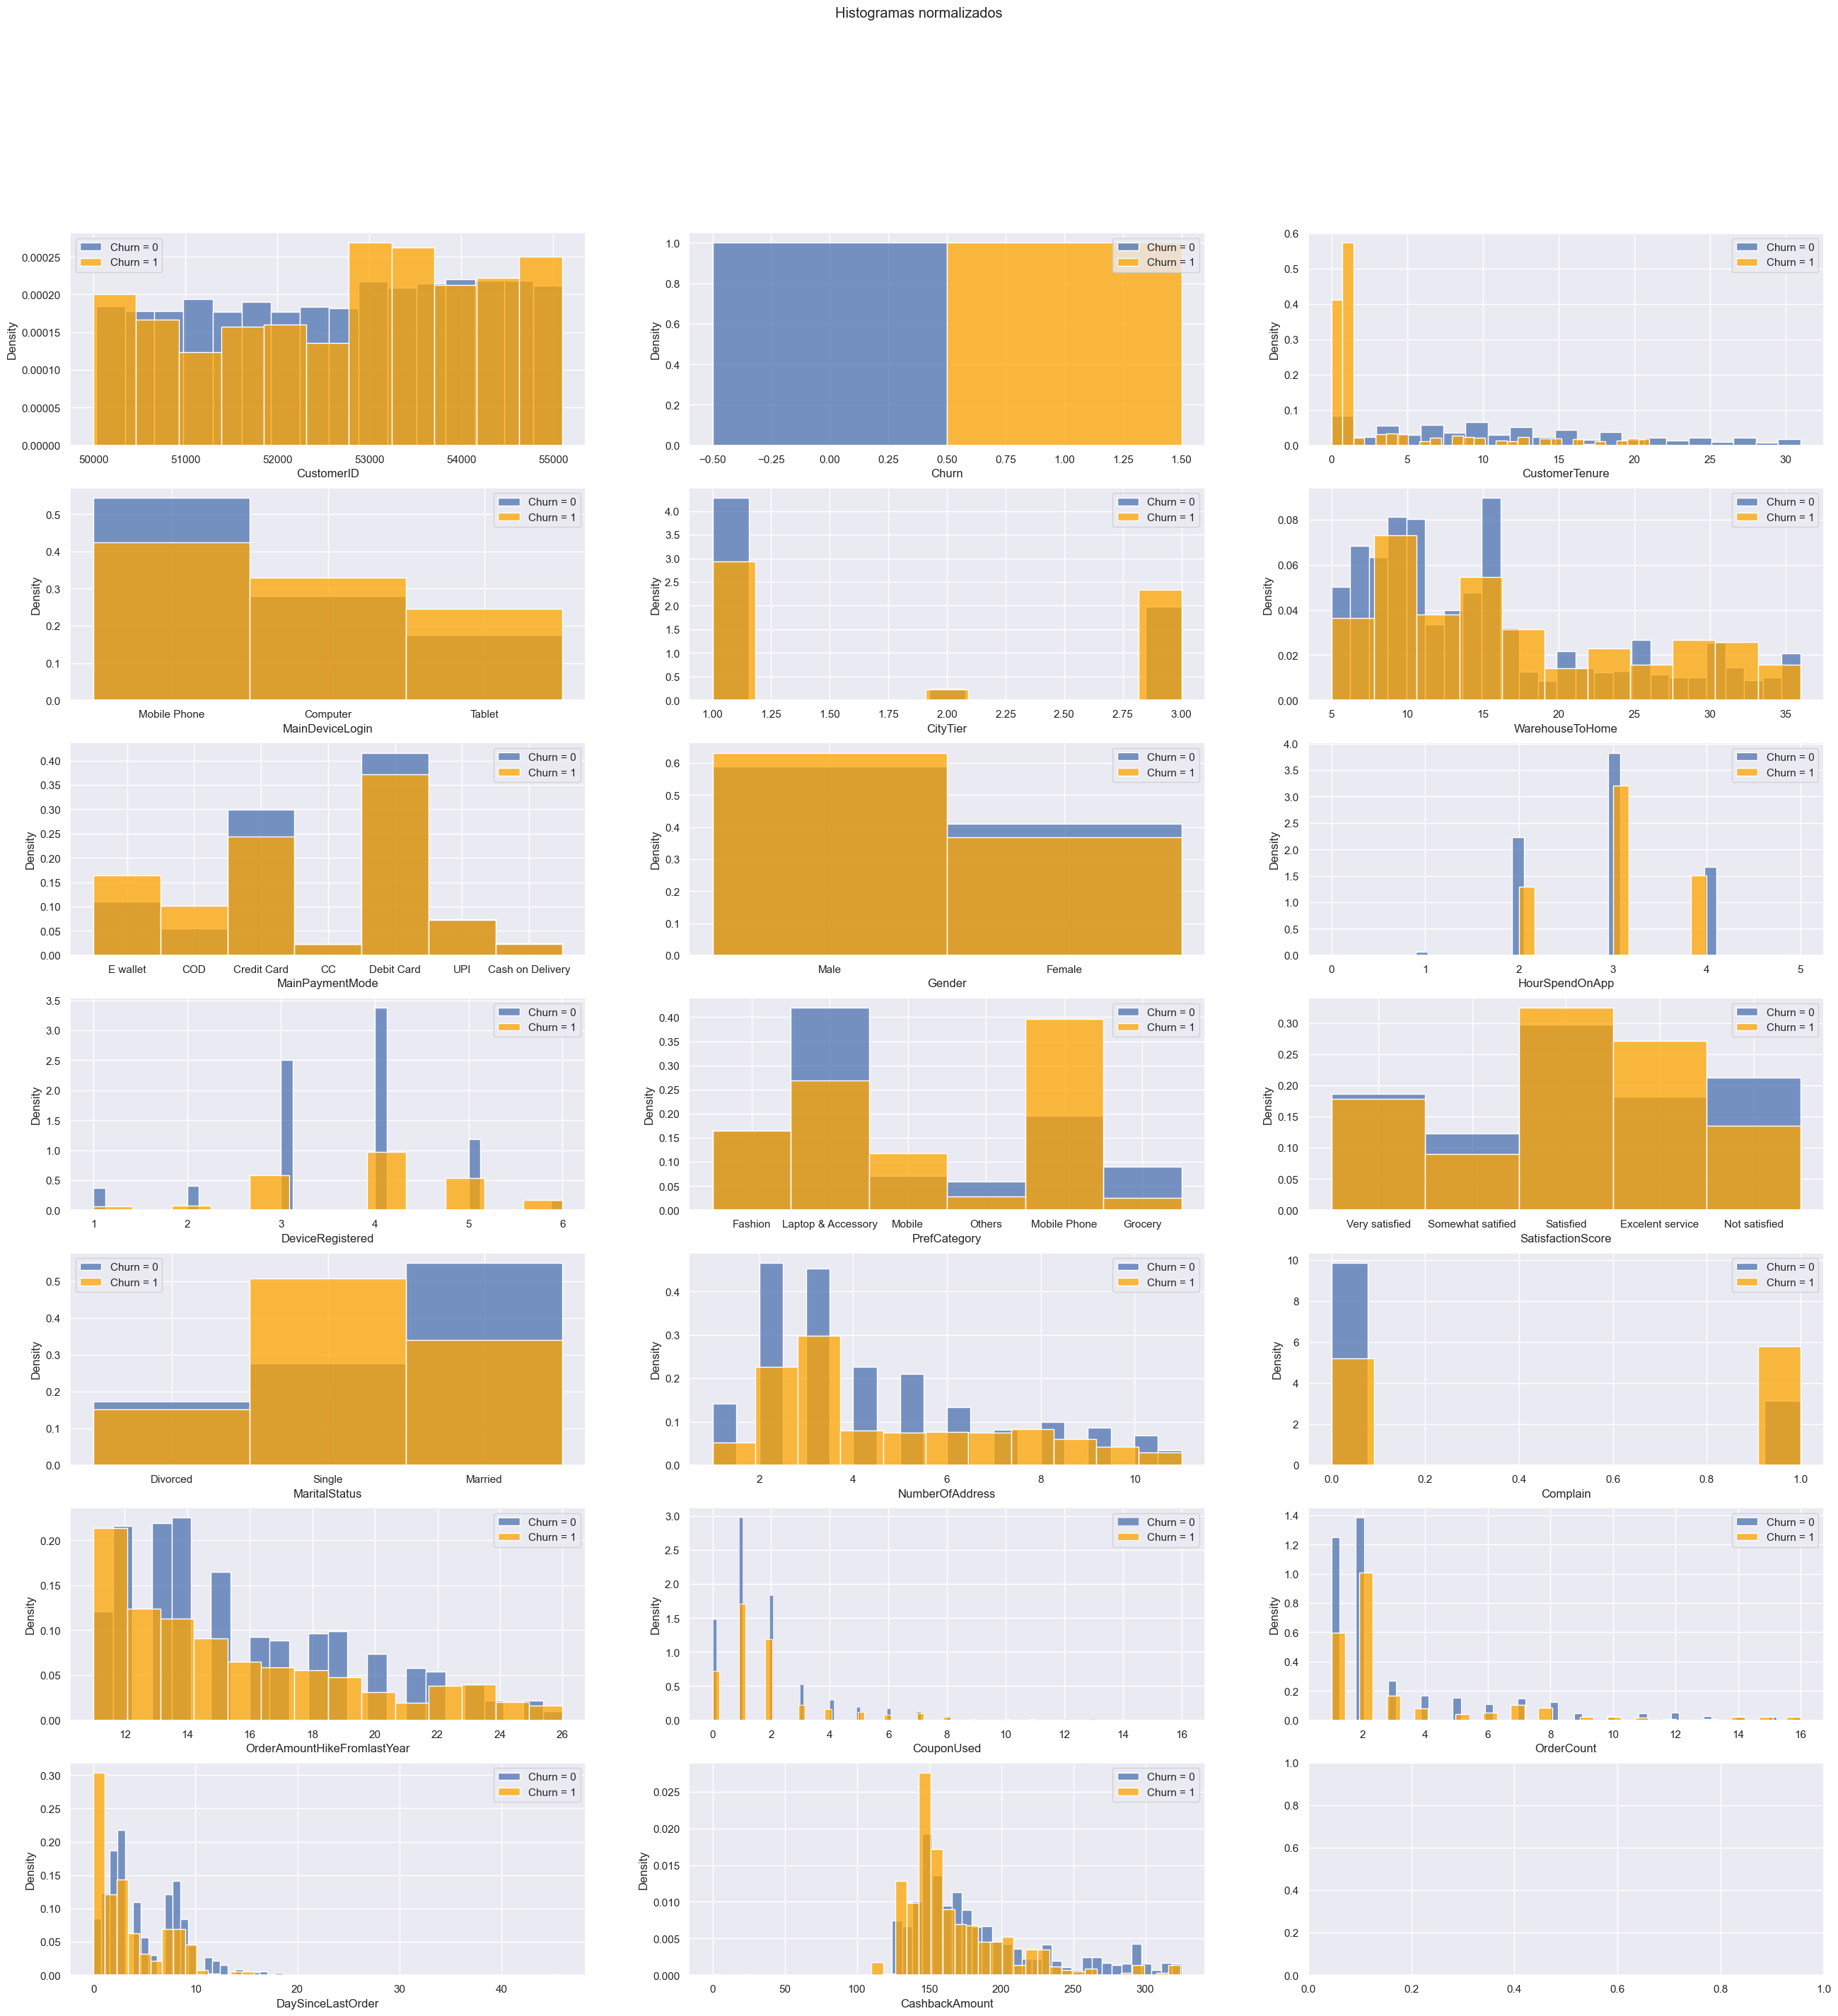

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(32,32))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(data.columns, axes.flatten()):
    sns.histplot(data = data.loc[data['Churn']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = data.loc[data['Churn']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['Churn = 0', 'Churn = 1'])

Podemos inferir que las variables que tendrán una significancia en establecer el valor del churn son aquellas en las cuales podemos observar diferencias en la distribución de los valores de churn.

Por lo tanto podemos descartar las variables que no presentan diferencias en la distribución de los valores de churn.

De los graficos podemos observar que: CustomerID, Gender, NumberOfAddress son las columnas que no permiten diferenciar lo mencionado anteriormente

In [18]:
## Variables a eliminar
columns_to_eliminate = ['CustomerID', 'Gender', 'NumberOfAddress']

data = data.drop(columns_to_eliminate, axis=1)

Veamos la correlación entre las variables

<AxesSubplot:>

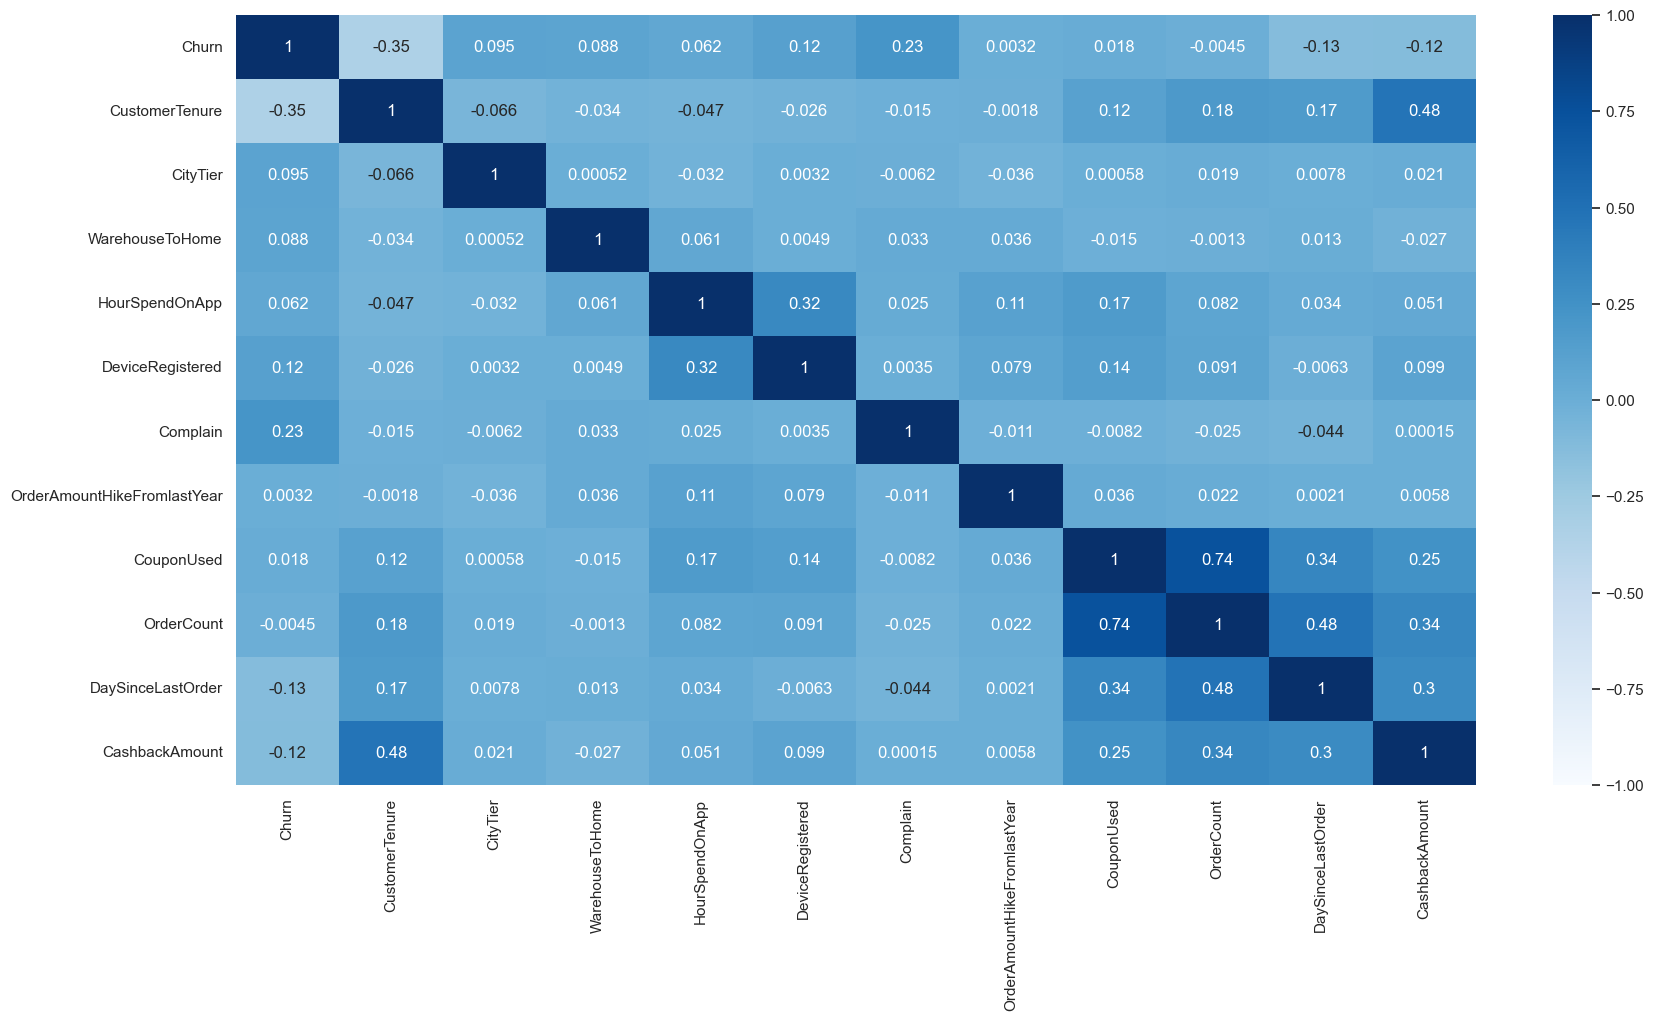

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='Blues')

In [20]:
## Correlación entre variables y churn
abs_corr = data.corr()[['Churn']].abs().sort_values(by='Churn', ascending=False)

<AxesSubplot:>

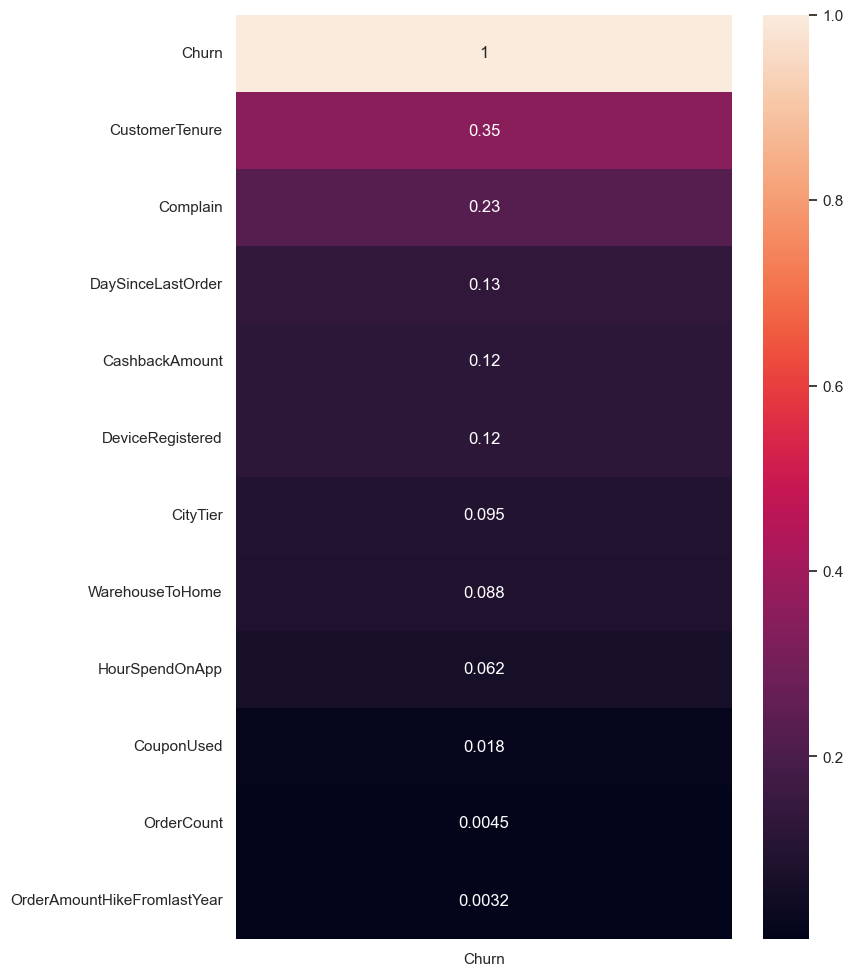

In [21]:
## Correlación entre variables y churn, absoluta (para ordenar sin tener en cuenta si es positiva o negativa)

plt.figure(figsize=(8,12))
sns.heatmap(abs_corr, annot=True)

Nos quedamos con las variables que tienen una correlación mayor a 0.1

In [22]:
## Variables con correlación mayor a 0.1

high_corr_vars = abs_corr[abs_corr['Churn'] > 0.1]

## Lo convertimos en una lista para poder iterar sobre ella

high_corr_vars = high_corr_vars.index.tolist()

high_corr_vars

['Churn',
 'CustomerTenure',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'DeviceRegistered']

In [23]:
# Modificamos nuestro dataset con las columnas de la lista que tienen correlacion mayor a 0.1
data = data[high_corr_vars]

### Eliminación de valores nan

In [24]:
## Veamos cuantos valores nulos hay en cada columna

data.isna().sum()

Churn                  0
CustomerTenure         0
Complain               0
DaySinceLastOrder    256
CashbackAmount         0
DeviceRegistered       0
dtype: int64

In [25]:
## Los eliminamos

data.dropna(inplace=True)

display(data.isna().sum())

print("El dataset limpio tiene {} filas y {} columnas".format(data.shape[0], data.shape[1]))



Churn                0
CustomerTenure       0
Complain             0
DaySinceLastOrder    0
CashbackAmount       0
DeviceRegistered     0
dtype: int64

El dataset limpio tiene 4320 filas y 6 columnas


Observemos la distribución de los valores de churn

In [26]:
display(data['Churn'].value_counts())
display(data['Churn'].value_counts(normalize=True))

0    3662
1     658
Name: Churn, dtype: int64

0    0.847685
1    0.152315
Name: Churn, dtype: float64

El dataset está desbalanceado, por lo que se deberá tener en cuenta al momento de entrenar los modelos.

## Separación de datos

In [27]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3456, 5)
(864, 5)
(3456,)
(864,)


## Preparación de datos

In [29]:
categorical_columns = [col for col in data.columns if data[col].dtypes == 'object']

categorical_columns

[]

In [30]:
numerical_columns = [col for col in data.columns if data[col].dtypes != 'object']

numerical_columns

['Churn',
 'CustomerTenure',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'DeviceRegistered']

In [31]:
# DeviceRegistered es una variable categórica 

numerical_columns.remove('DeviceRegistered')
categorical_columns.append('DeviceRegistered')

# La transformamos a categórica

X_train['DeviceRegistered'] = X_train['DeviceRegistered'].astype('object')
X_test['DeviceRegistered'] = X_test['DeviceRegistered'].astype('object')


In [32]:
# Complain es una variable categórica binaria 

numerical_columns.remove('Complain')
categorical_columns.append('Complain')

# La transformamos a categórica

X_train['Complain'] = X_train['Complain'].astype('object')
X_test['Complain'] = X_test['Complain'].astype('object')

In [33]:
display('categorical_columns',categorical_columns)
display('numerical_columns',numerical_columns)

'categorical_columns'

['DeviceRegistered', 'Complain']

'numerical_columns'

['Churn', 'CustomerTenure', 'DaySinceLastOrder', 'CashbackAmount']

### Variables categóricas

In [34]:
encoder_categories = []

X_categorical_columns = [x for x in categorical_columns]

for col in X_categorical_columns:    
    col_categories = data[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array([3, 4, 5, 2, 1, 6], dtype=int64), array([1, 0], dtype=int64)]

In [35]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False, drop='first')

encoder = encoder.fit(X_train[X_categorical_columns])

X_train_encoded = encoder.transform(X_train[X_categorical_columns])
X_train_categorical = pd.DataFrame(X_train_encoded, columns = encoder.get_feature_names_out(X_categorical_columns))

X_test_encoded = encoder.transform(X_test[X_categorical_columns])
X_test_categorical = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names_out(X_categorical_columns))
X_test_categorical.head()

,DeviceRegistered_4,DeviceRegistered_5,DeviceRegistered_2,DeviceRegistered_1,DeviceRegistered_6,Complain_0
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


### Variables numéricas

In [36]:
X_train_numerical = X_train.drop(X_categorical_columns, axis=1)
X_test_numerical = X_test.drop(X_categorical_columns, axis=1)

In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_numerical)
X_train_numerical = pd.DataFrame(X_train_scaled, columns = X_train_numerical.columns)

X_test_scaled = scaler.transform(X_test_numerical)
X_test_numerical = pd.DataFrame(X_test_scaled, columns = X_test_numerical.columns)
X_test_numerical.head()

,CustomerTenure,DaySinceLastOrder,CashbackAmount
0,-0.733294,0.889120,0.375356
1,-0.851403,-0.467404,-0.616038
2,1.038341,1.160425,2.297446
3,2.337540,-0.467404,1.164424
4,0.920232,-0.738709,0.577681


Unimos las variables numéricas y categóricas

In [38]:
X_train = pd.concat([X_train_categorical, X_train_numerical], axis=1)
X_test = pd.concat([X_test_categorical, X_test_numerical], axis=1)

> Modelos más simples, con menos variables, parecen ser los mejores. Por lo que se utilizarán las variables que presentan una mayor correlación con la variable objetivo.

In [39]:
X_train = X_train[['CustomerTenure', 'Complain_0']]
X_test = X_test[['CustomerTenure', 'Complain_0']]

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(3456, 2)
(864, 2)
(3456,)
(864,)


,CustomerTenure,Complain_0
0,2.219431,0.0
1,0.211578,1.0
2,0.093469,1.0
3,-0.497076,1.0
4,0.565905,0.0


In [41]:
# null accuracy - accuracy predicha por un modelo que predice siempre la clase mayoritaria

total = y_test.shape[0]
tn = y_test.value_counts()[0]
fn = y_test.value_counts()[1]
tp = 0
fp = 0
null_accuracy = (tp + tn)/(tp + tn + fp + fn)
print("TN: {}".format(tn))
print("FN: {}".format(fn))
print("Null accuracy: {}".format(null_accuracy))

# También podemos calcularlo con la siguiente función
# y_test.value_counts(normalize=True).max()

TN: 729
FN: 135
Null accuracy: 0.84375


## Utils para modelos

In [42]:
def create_confusion_matrix(y_test, y_pred):
    
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat_df = pd.DataFrame(conf_mat, index = ['Negative (No Churn)', 'Positive (Churn)'], columns = ['Negative (No Churn)', 'Positive (Churn)'])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues')
    plt.title('Matriz de confusión')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

In [43]:
def create_metrics(y_test, y_pred):
    tn = confusion_matrix(y_test, y_pred)[0,0]
    fp = confusion_matrix(y_test, y_pred)[0,1]


    # accuracy = (tp + tn) / (tp + tn + fp + fn)

    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

    # recall = tp / (tp + fn)

    print('Recall: %.3f' % recall_score(y_test, y_pred))

    # precision = tp / (tp + fp)

    print('Precision: %.3f' % precision_score(y_test, y_pred))

    # specificity = tn / (tn + fp)

    print('Specificity: %.3f' % (tn / (tn + fp)))

    # f1 = 2 * (precision * recall) / (precision + recall)

    print('F1 score: %.3f' % f1_score(y_test, y_pred))

In [44]:
def create_roc_curve(y_test, y_pred_proba):
    
    fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_log, tpr_log, label='GNB')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('GNB ROC Curve')
    plt.show()

    # AUC - Area Under the Curve

    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    print('AUC: %.2f' % auc)

In [45]:
def compare_thresholds(y_test, y_pred_proba):
    thresholds = np.arange(0, 1, 0.01)
    accuracy = []
    recall = []
    precision = []
    specificity = []
    f1 = []
    for i in thresholds:
        y_pred = binarize(y_pred_proba, threshold=i)[:,1]
        accuracy.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, zero_division=0))
        specificity.append(tn / (tn + fp))
        f1.append(f1_score(y_test, y_pred))
    plt.plot(thresholds, accuracy, label='accuracy')
    plt.plot(thresholds, recall, label='recall')
    plt.plot(thresholds, precision, label='precision')
    plt.plot(thresholds, specificity, label='specificity')
    plt.plot(thresholds, f1, label='f1')
    plt.legend()
    plt.xlabel('threshold')
    plt.ylabel('score')
    plt.show()

## Naive Bayes

### Modelo

In [46]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred = gnb.predict(X_test)


### Métricas

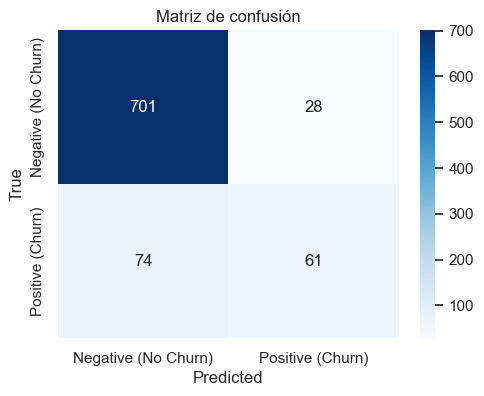

In [48]:
create_confusion_matrix(y_test, y_pred)

In [49]:
create_metrics(y_test, y_pred)

Accuracy: 0.882
Recall: 0.452
Precision: 0.685
Specificity: 1.000
F1 score: 0.545


In [50]:
y_pred_proba = gnb.predict_proba(X_test)

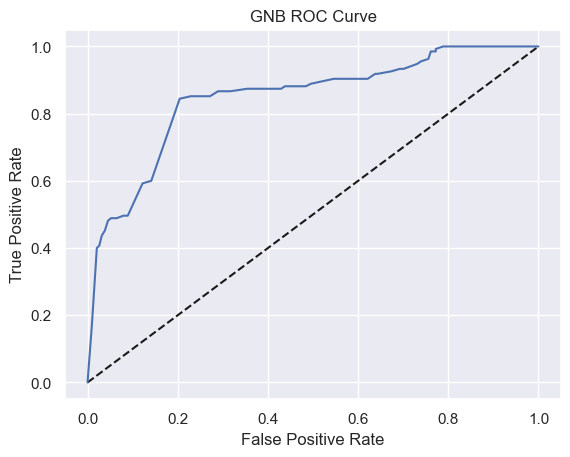

AUC: 0.85


In [51]:
create_roc_curve(y_test, y_pred_proba)

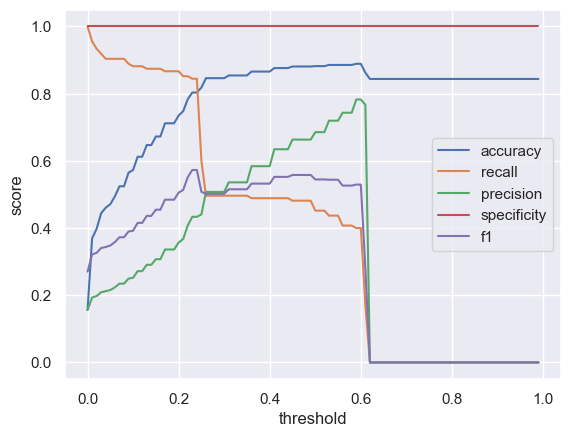

In [52]:
compare_thresholds(y_test, y_pred_proba)

El hecho que el mejor threshold sea 1 indica que el modelo no es capaz de predecir correctamente los casos de churn ya que la mejor opción es predecir que todos los clientes se quedan que es la hipótesis nula.

## KNN

### Modelo

In [53]:
def scores_knn(X, y, start,stop,step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [54]:
# Probamos de 1 a 20 vecinos
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

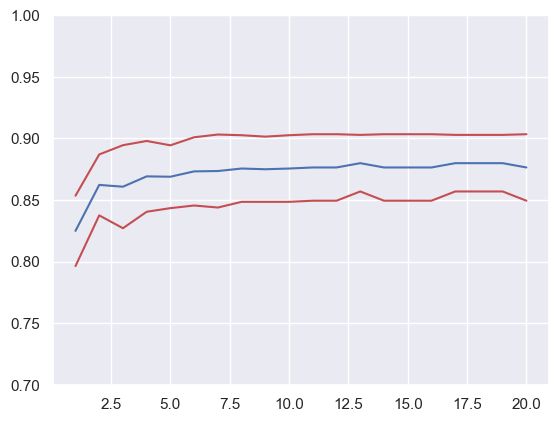

In [55]:
# Visualizamos los resultados

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.7, 1);

In [56]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
12,0.879894,0.02296,13,0.856934,0.902855
16,0.879894,0.02296,17,0.856934,0.902855
17,0.879894,0.02296,18,0.856934,0.902855
18,0.879894,0.02296,19,0.856934,0.902855


In [57]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

13

In [58]:
# Elegimos el modelo óptimo que nos había indicado cross validation
KNN = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [59]:
y_pred = KNN.predict(X_test)

In [60]:
y_pred_proba = KNN.predict_proba(X_test)

### Métricas

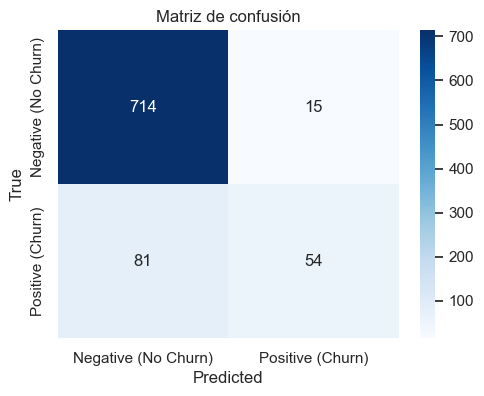

In [61]:
create_confusion_matrix(y_test, y_pred)

In [62]:
create_metrics(y_test, y_pred)

Accuracy: 0.889
Recall: 0.400
Precision: 0.783
Specificity: 1.000
F1 score: 0.529


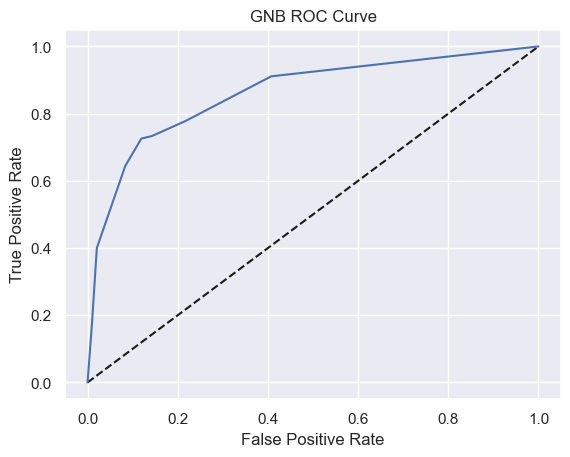

AUC: 0.86


In [63]:
create_roc_curve(y_test, y_pred_proba)

## Regresión logística

### Modelo

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
y_pred_proba = lr.predict_proba(X_test)

### Métricas

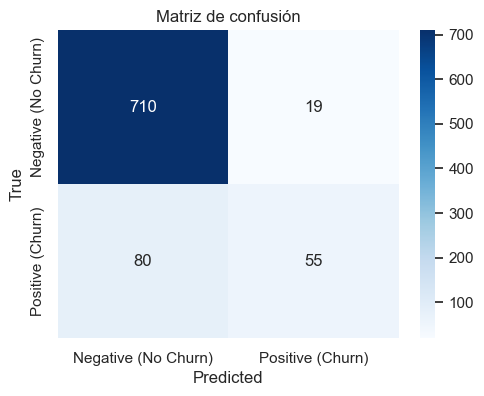

In [67]:
create_confusion_matrix(y_test, y_pred)

In [68]:
create_metrics(y_test, y_pred)

Accuracy: 0.885
Recall: 0.407
Precision: 0.743
Specificity: 1.000
F1 score: 0.526


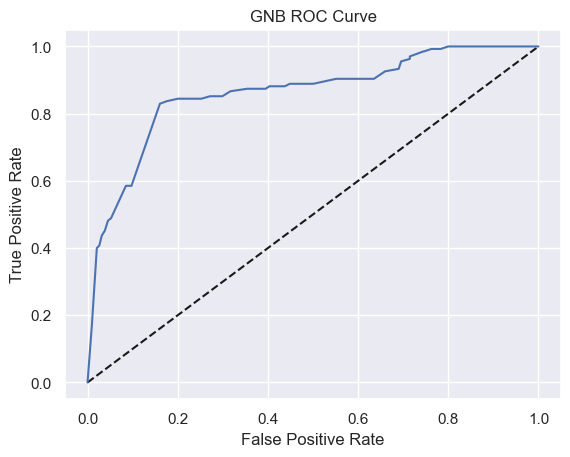

AUC: 0.86


In [69]:
create_roc_curve(y_test, y_pred_proba)

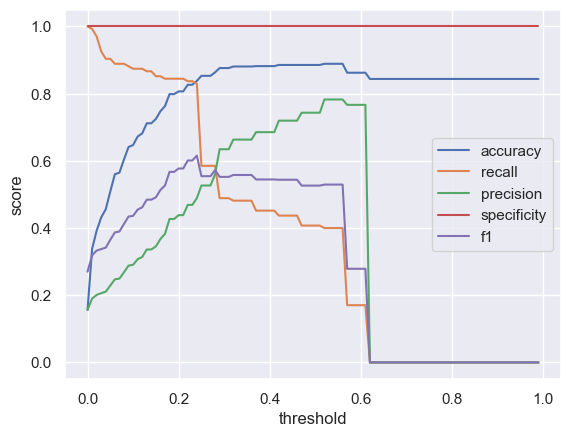

In [70]:
compare_thresholds(y_test, y_pred_proba)

## Conclusiones

- Los datos modelados tienen un 85% de casos con clientes que se no abandonan la app y 15 % de clientes que se dan de baja, por lo cual, consideramos que representa un alto sesgo para el modelo.